# Graph algorithms

Graphs are incredibly versatile data structures and due to this versatility they are ubiquitous in computing.

## Adjacency list

Besides the adjacency matrix representation of a graph which we cover [here](../../mathematics/discrete-math/graph_theory.ipynb) the other common way of representing a graph is using an adjacency list which {cite:p}`cormen2022introduction` say is what most of the graph algorithms they present use to represent graphs. For example for the graph $G$ shown below:

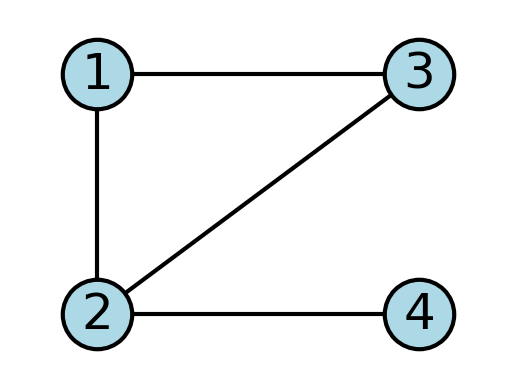

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from tabulate import tabulate
from IPython.display import Image

def get_full_adjlist(G, delimiter=" "):
     for s, nbrs in G.adjacency():
        line = str(s) + delimiter
        for t, data in nbrs.items():
                line += str(t) + delimiter
        yield line[: -len(delimiter)]


def adjlist_as_dict(G):
    adj_lst = {}
    for line in get_full_adjlist(G):
        nodes = line.split(" ")
        s = nodes[0]
        neighbors = nodes[1:]
        adj_lst[f"Node {s}"] = neighbors
    return adj_lst


options = {
    "font_size": 36,
    "node_size": 2500,
    "node_color": "lightblue",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 3,
    "font_family": "sans"
}

G = nx.Graph()
V = [1,2,3,4]
E = [(1,2), (2,3), (1,3), (2,4)]
G.add_nodes_from(V)
G.add_edges_from(E)

# explicitly set node positions
pos = {1: (0, 0), 2: (0, -1), 3: (1, 0), 4: (1, -1) }
nx.draw_networkx(G, pos, **options)
ax = plt.gca()
ax.margins(0.20)
plt.axis("off")
plt.show()

The adjacency list is given by

In [3]:
adj_lst = adjlist_as_dict(G)

print(tabulate(adj_lst, headers="keys", tablefmt='fancy_grid'))

╒══════════╤══════════╤══════════╤══════════╕
│   Node 1 │   Node 2 │   Node 3 │   Node 4 │
╞══════════╪══════════╪══════════╪══════════╡
│        2 │        1 │        2 │        2 │
├──────────┼──────────┼──────────┼──────────┤
│        3 │        3 │        1 │          │
├──────────┼──────────┼──────────┼──────────┤
│          │        4 │          │          │
╘══════════╧══════════╧══════════╧══════════╛


## Graph traversal

### Depth first search (DFS)

DFS explores the graph in a depth first manner meaning it explores all edges to unexplored edges from a given node before backtracking to the node it started on once it reaches a node that has no edges that lead to unexplored edges. In other words it recursively explores nodes until it reaches a leaf node at which point it backtracks. DFS uses a stack as it's data structure.

Runtime is $O(|V|+|E|)$

DFS can be used to find connected components in undirected graphs since in an undirected graph DFS's explore subroutine will explore all nodes reachable from the starting node and all nodes within the same connected component are reachable from any other node in the connected component in general for *undirected* graphs. Will label each node with it's connected component number. When used on a DAG it returns a topological ordering of the nodes so can be used to topologically sort a graph.

```{prf:algorithm} Explore
:class: dropdown
:label: explore
**procedure** $\text{Explore}(G, v,$ visited$)$:

**Inputs** Given a graph $G=(V,E)$, a node $v$ and a list of booleans, visited, which indicate which nodes have been visited 

**Output** Nothing but visited($w$) is set to $\text{True}$ for all nodes, $w$, which are reachable from $v$

1. visited($w$) = $\text{True}$
2. $\text{previsit}(v)$
3. for each edge $(u,v) \in E$:
   1. if visited($u$) == $\text{False}$:
      1. $\text{Explore}$($G$, $u$)
4. $\text{postvisit}(v)$
```

```{prf:algorithm} Depth First Search
:class: dropdown
:label: dfs
**procedure** $\text{DFS}(G)$:

**Inputs** Given a graph $G=(V,E)$

**Output** A list called visited which contains the pre-order and post-order number of each node computed during the depth first search.

1. for each $v\in V$:
   1. visited($v$) = $\text{False}$
2. for each $v \in V$:
   1. if visited($v$) == $\text{False}$
      1. $\text{Explore}(G,v,$ visited$)$

3. return visited

```

### Breadth first search (BFS)

BFS explores the graph in layers. 
Returns the minimum number of edges one must traverse to get from a starting node $s$ to all other nodes. If there is no path from $s$ to a node $t$ then the minimum number of edges one must traverse is set to $\infty$. BFS utilizes a min heap (also called a priority queue). Note that this means BFS will find the shortest paths in graphs that are *unweighted* but if the graph is weighted then the shortest path will in general not be found by BFS since each edge in general does not have the same weight.

Runtime is $O(|V|+|E|)$

## Shortest paths

### Dijkstra's algorithm

Sort of a generalization of BFS but works on weighted graphs where the edge weights are positive. If a negative edge weight exists Dijkstra's will fail if this negative edge weight produces a *negative weight cycle*.

Runtime is $O(|V|\log{(|V|)}+|E|\log{(|V|)})$

### Bellman-Ford algorithm

Can be understood as a dynamic programming algorithm and works on graphs with edges weights that can be any real number so long as there are no *negative weight cycles* reachable from the starting node $s$.

Runtime is $O(|V||E|)$

### Floyd–Warshall algorithm

Can be understood as a dynamic programming algorithm. Runtime is $O(|V|^3)$

## Strongly connected components 

### Kosaraju's algorithm 

This algorithm outputs a meta-graph where the nodes correspond to strongly connected components (SCCs) of the graph $G$ and the edges $(u,v)$ denote that there is a path from all nodes in SCC $u$ to all nodes in SCC $v$. 

Runtime is $O(|V|+|E|)$ which is the same as DFS/BFS since we simply run DFS on $G^R$ and DFS on $G$.

## Minimum spanning trees

The definition of a minimum spanning tree is covered [here](../../mathematics/discrete-math/graph_theory.ipynb) but how can we find the MST of an arbitrary weighted undirected graph?

### Kruskal's algorithm

Runtime is $O(|E|\log{(|V|)})$

### Prim's algorithm

Runtime is $O(|V|\log{(|V|)}+|E|\log{(|V|)})$

## Max flow

### Flow networks

A flow network is a directed weighted graph $G=(V,E)$ with start and end node, $s$ and $t$ respectively, where the edge weights $c_e>0$ denote edge capacity i.e. the maximum amount of something that can flow through the edge $e\in E$. For example in the flow network below if we were to imagine node $s$ represented a water source and the edges denoted how much water in liters can flow along the edges, so $3$ liters can flow form $s$ to $a$, $2$ liters from $a$ to $d$ and so on, and node $t$ is the node we wish to transport the water to. 

A *flow* in the network is an assignment of flows, denoted $f_e$, for each edge in the network such that $f_e\leq c_e$ and the sum of flows *into* a node equals the sum of flows *out* of a node so the flow is conserved. For example in the flow depicted below we can see that a total of $2+1+4$ units flow from node $s$ and a total amount $2+1+4$ units flow into node $t$ the sink/target node.

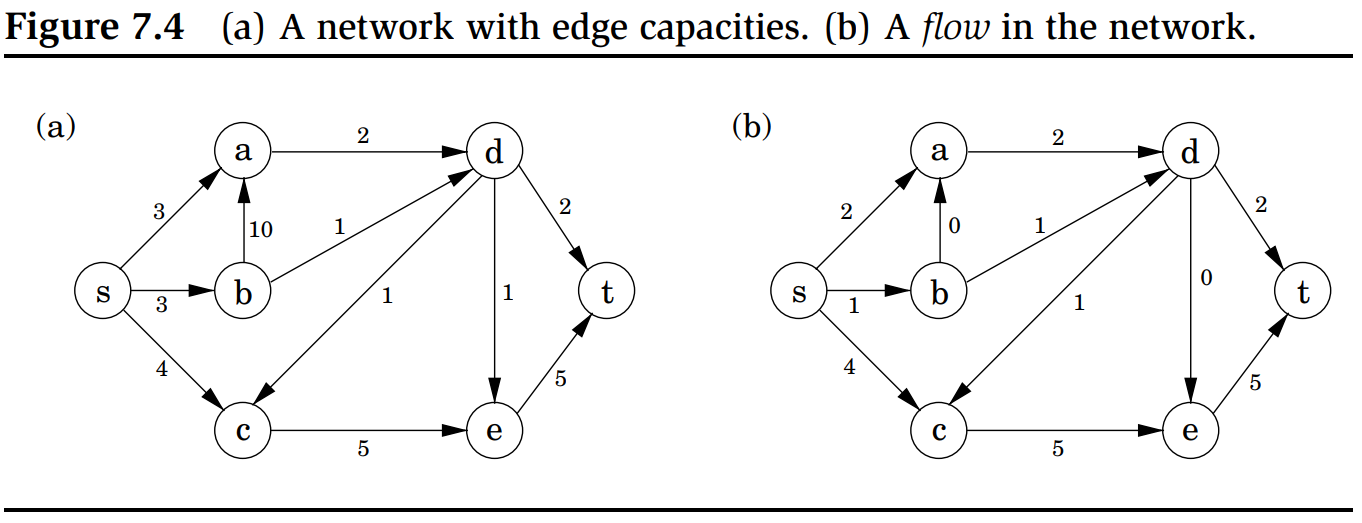

In [4]:
display(Image("img/flow_network.png", width=600))

### Max-Flow problem

The max-flow problem is the problem of finding an assignment of flows in the network such that 

$$
f_e \leq c_e \quad \forall e \in E\\
\text{and} \\
f_v^{in} = f_v^{out} \quad \forall v \in V \quad \text{except nodes $s$ and $t$}

$$

and the total flow *out* of node $s$, the source node, and therefore the total flow *into* $t$, the sink node, is maximized (so the max flow is equal to both the total flow *out* of $s$ and the total flow *into* $t$). Note that the max flow is clearly upper bounded by which ever is greater between the sum of capacities of edges incident to $s$ or sum of capacities of edges incident to $t$.

Also note that cycles in the flow network do not affect the problem.

### Ford-Fulkerson algorithm 

Find augmenting paths in the residual graph $G^f$ for the current flow $f$ using either BFS or DFS.

The runtime is $O(C|E|)$ where $C$ is the size of the max flow. Note that this only holds if all edges have *integer* valued capacities so $c_e \in \mathbb{Z^+} \quad \forall e \in E$. Also not that this runtime is similar to that of knapsack as it depends on $C$ so it is not truly polynomial.

### Edmonds-Karp algorithm

Find augmenting paths in the residual graph $G^f$ for the current flow $f$ using *BFS*. Edge capacities can now be $\in \mathbb{R}^+$.

The runtime is $O(|V||E|^2)$

### Other algorithms

There have been faster algorithms found by  James B. Orlin in 2013 which takes $O(|V||E|)$ time and by Li Chen et al. which takes $O(|E|^{1+o(1)})$ time. Cool.

## Practice problems

### 3.3 Topological ordering example

a) 
To get this we first start with node A which will have preorder number 1 since it was the first to be visited. We then follow the edge to C which will have preorder number 2 since it was the second to be visited. Then we have two choices for which node to explore next, D or E, the problem says pick the one that is alphabetically first so we explore D which will get preorder number 3. We do this until we get to node G which will be the 5th to be explored so it gets preorder number 5. Now we backtrack by going back to node F and leaving node G so node G gets *post*order number 6. From F we can now explore the other neighbor H which will get preorder number 7 and since it has no children we backtrack to node F and give node H postorder number 8. Since we explored all of F's children we backtrack to D and give F postorder number 9 and so on until we get back to node A which gets post order number 14. Finally, we explore node B which gets preorder number 15 and since it has no children that haven't been explored we stop the algorithm and give it postorder number 16.

The pre and post order numbers are:

Node A: pre-1, post-14

Node B: pre-15, post-16

Node C: pre-2, post-13

Node D: pre-3, post-10

Node E: pre-11, post-12

Node F: pre-4, post-9

Node G: pre-5, post-6

Node H: pre-7, post-8

b) sources are A and B. Sinks are G and H

c) Per the lecture we just need to sort the vertices by decreasing post order number to get the topological ordering found by the algorithm which is 
B,A,C,E,D,F,H,G.

d) There are $2^3=8$ topological orderings for this graph. Since we have 2 choices for how to order A and B, two choices for how to order D and E and two choices for how to order G and H.

### 3.5 Reverse a graph

Given a graph $G=(V,E)$

1) Create a new empty adjacency list $L$. 
2) Iterate over the nodes in the $V$. 
3) When on node $u$ check all of its neighbors. For a given neighbor $w$ add $u$ to the edge list of $w$ in the new adjacency list $L$. 

At the end $L$ will have all edges of $G$ but reversed. This takes $O(|E|+|V|)$ time since we must iterate over all nodes and their respective edges. Not sure if there is a way to do this in-place at the moment.


### 3.8 Pouring water

### 3.11 Cycle containing an edge $e$

?

### 3.15 Computopia

a) To formulate this as a graph problem we represent the intersections in the city as nodes and the streets that connect them as *directed* edges. To solve this problem we just need to show that the graph has exactly 1 strongly connected component i.e. there is a path from intersection $u$ to intersection $v$ and path from intersection $v$ to intersection $u$ for all nodes $u$ and $v$ in the graph. This can be checked using Kosaraju's algorithm to get the meta-graph, which is $O(|V|+|E|)$, and checking that it contains only one node which is $O(1)$. 

b) This is equivalent to saying there is a strongly connected component in the graph from part a that includes node $t$ (the town hall) adn that this SCC is a sink SCC since we can not arrive at a node that we can't return to the SCC from. This can also be checked in linear time by using Kosaraju's algorithm to get the meta-graph of SCCs and checking each meta vertex to see if node $t$ is in that meta vertex (SCC).

### 3.25 Minimum cost node

a)



b)


### 4.14 Shortest path through a given vertex

Use Floyd-Warshall to find the shortest paths between all nodes. Then for each node $v\in V$ find the shortest path found by Floyd-Warshall from it to $v_0$ and the shortest path from $v_0$ to every other node besides $v$ and concatenate the paths to the shortest path from $v$ to $v_0$. Complexity is $O(|V|^3)$ since we used Floyd-Warshall and also have an additional $O(|V|^2)$ component to create the shortest paths that pass through $v_0$ for each node pair from the output of Floyd-Warshall.

For a faster way we can run Dijkstra on the graph with the source node as $v_0$ which will give use the shortest path from $v_0$ to all other nodes. Now for each node in $G$ besides $v_0$ we will run Dijkstra with it as the source node 

$O(|V|(|V|\log{(|V|)}+|E|\log{(|V|)}))= O(|V|^2\log{(|V|)}+|V||E|\log{(|V|)})$

In [5]:
%load_ext watermark
%watermark -n -u -v -iv

Last updated: Thu Oct 03 2024

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 8.22.2

networkx  : 3.2.1
matplotlib: 3.7.4

